# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [4]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [5]:
# Download front-month futures data
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
data = yf.download(symbols)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


In [6]:
# get the number of nans per column 
data.isna().sum()

Price   Ticker
Close   DX=F       14
        ES=F       74
        GC=F      102
        ZN=F      112
High    DX=F       14
        ES=F       74
        GC=F      102
        ZN=F      112
Low     DX=F       14
        ES=F       74
        GC=F      102
        ZN=F      112
Open    DX=F       14
        ES=F       74
        GC=F      102
        ZN=F      112
Volume  DX=F       14
        ES=F       74
        GC=F      102
        ZN=F      112
dtype: int64

In [7]:
data

Price            Close                                         High          \
Ticker            DX=F     ES=F         GC=F       ZN=F        DX=F    ES=F   
Date                                                                          
2000-06-22  107.400002      NaN          NaN        NaN  107.639999     NaN   
2000-06-23  107.720001      NaN          NaN        NaN  107.879997     NaN   
2000-06-26  107.769997      NaN          NaN        NaN  108.260002     NaN   
2000-06-27  106.980003      NaN          NaN        NaN  107.849998     NaN   
2000-06-28  107.250000      NaN          NaN        NaN  107.599998     NaN   
...                ...      ...          ...        ...         ...     ...   
2025-03-03  106.668999  5860.75  2890.199951  111.37500  107.360001  6000.5   
2025-03-04  105.686996  5789.50  2909.600098  111.21875  106.599998  5884.0   
2025-03-05  104.251999  5851.25  2915.300049  110.84375  105.724998  5869.5   
2025-03-06  104.028000  5746.25  2916.600098  110.78125  104.360001  5853.5   
2025-03-07  103.855003  5771.75  2917.699951  110.62500  104.205002  5791.0   

Price                                       Low                        \
Ticker             GC=F        ZN=F        DX=F     ES=F         GC=F   
Date                                                                    
2000-06-22          NaN         NaN  106.900002      NaN          NaN   
2000-06-23          NaN         NaN  107.070000      NaN          NaN   
2000-06-26          NaN         NaN  107.599998      NaN          NaN   
2000-06-27          NaN         NaN  106.970001      NaN          NaN   
2000-06-28          NaN         NaN  107.029999      NaN          NaN   
...                 ...         ...         ...      ...          ...   
2025-03-03  2891.800049  111.593750  106.364998  5821.75  2863.399902   
2025-03-04  2927.899902  110.906250  105.474998  5744.00  2886.100098   
2025-03-05  2922.000000  111.453125  104.199997  5750.75  2893.000000   
2025-03-06  2918.600098  110.906250  103.720001  5720.00  2903.800049   
2025-03-07  2938.800049  111.359001  103.430000  5673.00  2905.300049   

Price                         Open                                     Volume  \
Ticker            ZN=F        DX=F     ES=F         GC=F        ZN=F     DX=F   
Date                                                                            
2000-06-22         NaN  107.099998      NaN          NaN         NaN    666.0   
2000-06-23         NaN  107.430000      NaN          NaN         NaN    258.0   
2000-06-26         NaN  107.680000      NaN          NaN         NaN    266.0   
2000-06-27         NaN  107.849998      NaN          NaN         NaN    669.0   
2000-06-28         NaN  107.059998      NaN          NaN         NaN    258.0   
...                ...         ...      ...          ...         ...      ...   
2025-03-03  110.828125  107.345001  5967.50  2872.699951  110.984375  26743.0   
2025-03-04  110.906250  106.464996  5874.00  2886.100098  110.906250  30314.0   
2025-03-05  110.687500  105.580002  5832.00  2916.699951  110.906250  39013.0   
2025-03-06  110.390625  104.285004  5844.75  2904.000000  110.640625  28107.0   
2025-03-07  110.469002  104.160004  5766.00  2919.199951  110.828003  34546.0   

Price                                       
Ticker           ES=F      GC=F       ZN=F  
Date                                        
2000-06-22        NaN       NaN        NaN  
2000-06-23        NaN       NaN        NaN  
2000-06-26        NaN       NaN        NaN  
2000-06-27        NaN       NaN        NaN  
2000-06-28        NaN       NaN        NaN  
...               ...       ...        ...  
2025-03-03  2610882.0     423.0    24895.0  
2025-03-04  3353551.0     885.0    20690.0  
2025-03-05  2284032.0     551.0     9145.0  
2025-03-06  2553819.0     870.0     6317.0  
2025-03-07  2245481.0  214132.0  3061614.0  

[6254 rows x 20 columns]

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [8]:
# Keep only Close prices
daily_prices = data["Close"]
# analyze the Nans 
daily_prices.isna().sum()

Ticker
DX=F     14
ES=F     74
GC=F    102
ZN=F    112
dtype: int64

In [9]:
# drop the nans
daily_prices = daily_prices.dropna()
daily_prices.shape

(6115, 4)

In [10]:
# verify there is no nans 
daily_prices.isna().sum()

Ticker
DX=F    0
ES=F    0
GC=F    0
ZN=F    0
dtype: int64

In [11]:
# Resample data to monthly frequency
# Get the average monthly price
prices = daily_prices.resample("ME").mean()
prices

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-09-30,113.461428,1459.821429,273.957140,100.064739
2000-10-31,115.898181,1403.818182,269.809090,100.848732
2000-11-30,116.214501,1383.100000,265.874997,101.193761
2000-12-31,112.670501,1339.212500,271.515005,104.048451
2001-01-31,110.111428,1345.345238,265.371427,105.037220
...,...,...,...,...
2024-11-30,105.778600,5955.087500,2649.815015,109.977344
2024-12-31,107.077904,6028.500465,2643.580950,109.820685
2025-01-31,108.437714,6013.023810,2722.947626,108.444940


### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [12]:
prices.index

DatetimeIndex(['2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=295, freq='ME')

## Check Missing Values

In [13]:
prices.isna().sum()

Ticker
DX=F    0
ES=F    0
GC=F    0
ZN=F    0
dtype: int64

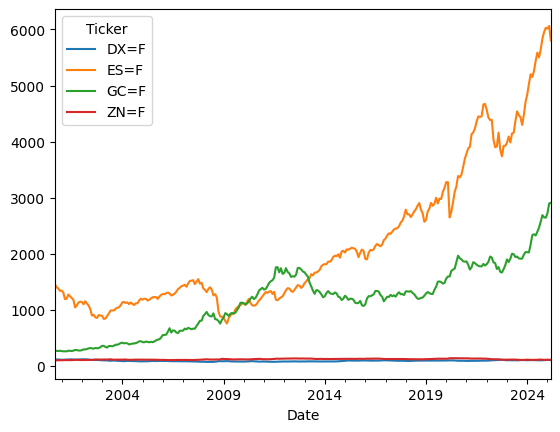

In [14]:
prices.plot()
plt.show()

In [15]:
prices

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-09-30,113.461428,1459.821429,273.957140,100.064739
2000-10-31,115.898181,1403.818182,269.809090,100.848732
2000-11-30,116.214501,1383.100000,265.874997,101.193761
2000-12-31,112.670501,1339.212500,271.515005,104.048451
2001-01-31,110.111428,1345.345238,265.371427,105.037220
...,...,...,...,...
2024-11-30,105.778600,5955.087500,2649.815015,109.977344
2024-12-31,107.077904,6028.500465,2643.580950,109.820685
2025-01-31,108.437714,6013.023810,2722.947626,108.444940


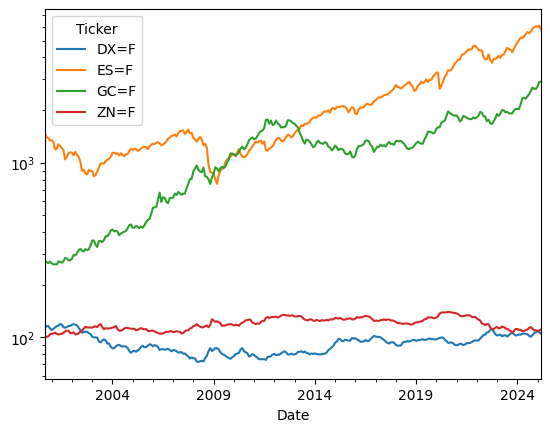

In [16]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


## Log returns 
$$
log(r_{t,t+1} ) = log(p_{t+1}) - log(p_{t}) - log(1)
$$

$$
= log(p_{t+1}) - log(p_{t}) 
$$

In [17]:

# Compute arithmetic returns
returns = prices.pct_change().dropna()

In [18]:
returns 

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-10-31,0.021476,-0.038363,-0.015141,0.007835
2000-11-30,0.002729,-0.014758,-0.014581,0.003421
2000-12-31,-0.030495,-0.031731,0.021213,0.028210
2001-01-31,-0.022713,0.004579,-0.022627,0.009503
2001-02-28,0.015488,-0.025764,-0.013438,0.001736
...,...,...,...,...
2024-11-30,0.025760,0.020313,-0.014537,-0.018554
2024-12-31,0.012283,0.012328,-0.002353,-0.001424
2025-01-31,0.012699,-0.002567,0.030022,-0.012527


In [19]:
# Cehck if there are infinity values 
returns.isin([np.inf, -np.inf]).sum()

Ticker
DX=F    0
ES=F    0
GC=F    0
ZN=F    0
dtype: int64

In [20]:
returns 

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-10-31,0.021476,-0.038363,-0.015141,0.007835
2000-11-30,0.002729,-0.014758,-0.014581,0.003421
2000-12-31,-0.030495,-0.031731,0.021213,0.028210
2001-01-31,-0.022713,0.004579,-0.022627,0.009503
2001-02-28,0.015488,-0.025764,-0.013438,0.001736
...,...,...,...,...
2024-11-30,0.025760,0.020313,-0.014537,-0.018554
2024-12-31,0.012283,0.012328,-0.002353,-0.001424
2025-01-31,0.012699,-0.002567,0.030022,-0.012527


In [21]:
# replace inf with nan then drop the rows
returns = returns.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [22]:
print(returns)

Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-10-31  0.021476 -0.038363 -0.015141  0.007835
2000-11-30  0.002729 -0.014758 -0.014581  0.003421
2000-12-31 -0.030495 -0.031731  0.021213  0.028210
2001-01-31 -0.022713  0.004579 -0.022627  0.009503
2001-02-28  0.015488 -0.025764 -0.013438  0.001736
...              ...       ...       ...       ...
2024-11-30  0.025760  0.020313 -0.014537 -0.018554
2024-12-31  0.012283  0.012328 -0.002353 -0.001424
2025-01-31  0.012699 -0.002567  0.030022 -0.012527
2025-02-28 -0.011212  0.008232  0.063919  0.009823
2025-03-31 -0.021672 -0.042660  0.004448  0.013319

[294 rows x 4 columns]


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [23]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window_size).std() # YOUR CODE HERE
    rolling_inverse_vol = 1/rolling_vol # YOUR CODE HERE
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(
        lambda column : column / rolling_inverse_vol.sum(axis = 1)
    ) # YOUR CODE HERE
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1) # YOUR CODE HERE
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

In [24]:
risk_parity_weights

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-10-31,NaN,NaN,NaN,NaN
2000-11-30,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaN,NaN,NaN
2001-01-31,NaN,NaN,NaN,NaN
2001-02-28,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-11-30,0.320949,0.161747,0.174804,0.342499
2024-12-31,0.317655,0.165780,0.174910,0.341654
2025-01-31,0.316580,0.165551,0.175930,0.341938


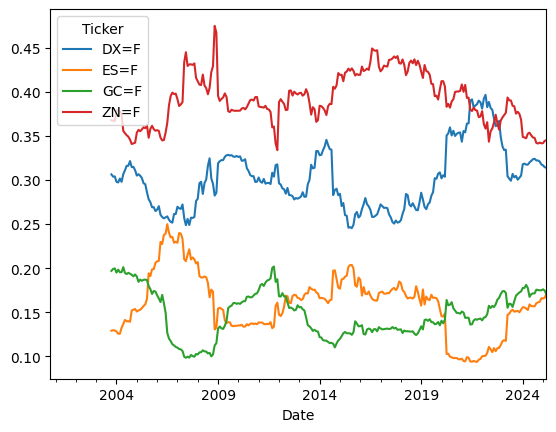

In [25]:
risk_parity_weights.plot()
plt.show()

# Stacked Line Chart 



In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Key addition for date handling
import pandas as pd



In [27]:
def stacked_line_chart(df):
    # Custom names for the legend
    legend_names = {
        'ES=F': 'S&P 500 Futures',
        'ZN=F': '10-Year Treasury Futures',
        'GC=F': 'Gold Futures',
        'DX=F': 'US Dollar Index Futures'
    }
    
    # Rename columns for the legend
    df = df.copy().rename(columns=legend_names)

    # Create a stacked area chart
    ax = df.plot.area(stacked=True, figsize=(14, 7))

    # ------------------------------------------------------
    # FIX: Correctly set x-axis limits and ticks for month-end data
    # ------------------------------------------------------
    # Get the first and last date in the index
    start_date = df.index.min()
    end_date = df.index.max()

    # Calculate axis limits to start at Jan 1st of the first year
    # and end at Dec 31st of the last year
    x_start = pd.Timestamp(year=start_date.year, month=1, day=31)
    x_end = pd.Timestamp(year=end_date.year, month=12, day=31)

    ax.set_xlim(x_start, x_end)  # Extend axis to include full years
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Proportion')
    plt.title('Monthly Asset Allocation')

    # Adjust legend position
    plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()

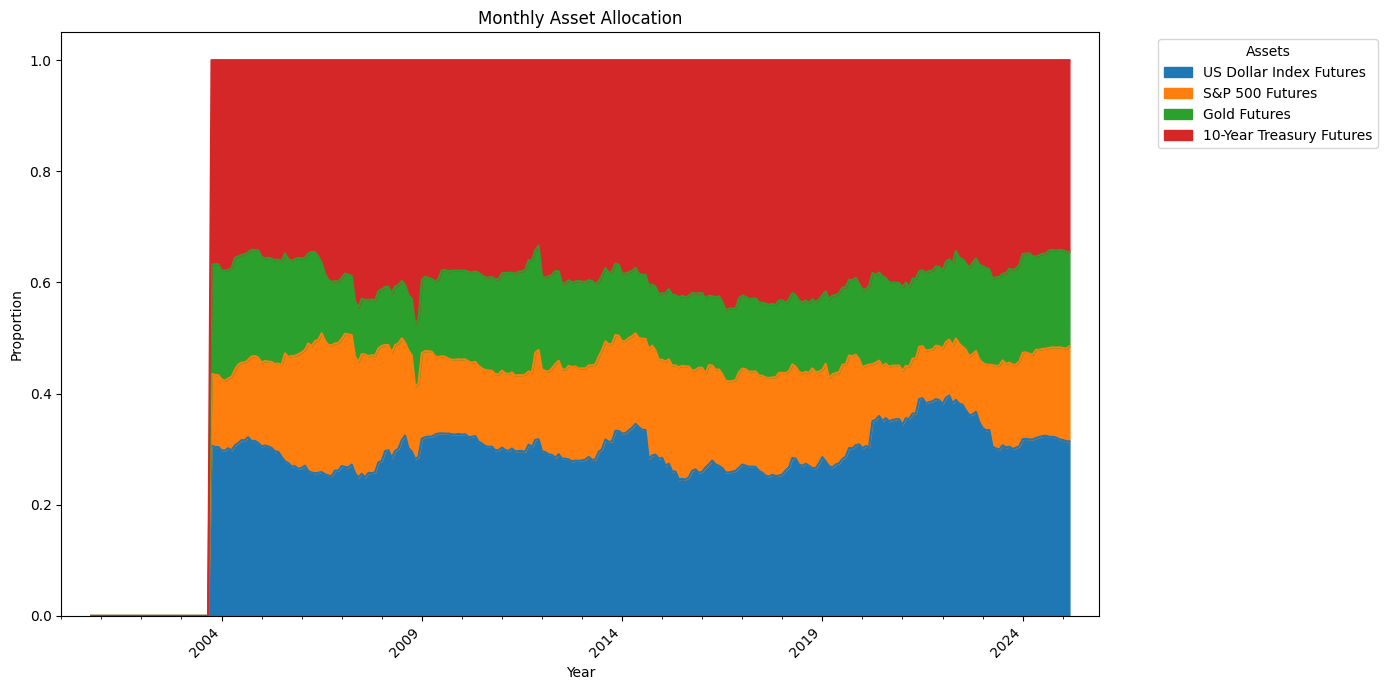

In [28]:
stacked_line_chart(risk_parity_weights)

In [29]:
risk_parity_weights.index

DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=294, freq='ME')

In [30]:
risk_parity_weights.isna().sum()

Ticker
DX=F    36
ES=F    36
GC=F    36
ZN=F    36
dtype: int64

In [31]:
returns 

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-10-31,0.021476,-0.038363,-0.015141,0.007835
2000-11-30,0.002729,-0.014758,-0.014581,0.003421
2000-12-31,-0.030495,-0.031731,0.021213,0.028210
2001-01-31,-0.022713,0.004579,-0.022627,0.009503
2001-02-28,0.015488,-0.025764,-0.013438,0.001736
...,...,...,...,...
2024-11-30,0.025760,0.020313,-0.014537,-0.018554
2024-12-31,0.012283,0.012328,-0.002353,-0.001424
2025-01-31,0.012699,-0.002567,0.030022,-0.012527


### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [32]:
# Calculate weighted returns
weighted_returns = returns*risk_parity_weights # YOUR CODE HERE
# for each month we have the portfolio return 
risk_parity_portfolio_returns = weighted_returns.sum(axis = 1) # YOUR CODE HERE

In [33]:
print(risk_parity_portfolio_returns)

Date
2000-10-31    0.000000
2000-11-30    0.000000
2000-12-31    0.000000
2001-01-31    0.000000
2001-02-28    0.000000
                ...   
2024-11-30    0.002657
2024-12-31    0.005047
2025-01-31    0.004594
2025-02-28    0.012376
2025-03-31   -0.008751
Freq: ME, Length: 294, dtype: float64


In [34]:
# compounded return 
((1+ risk_parity_portfolio_returns).prod()-1)*100

np.float64(98.94331679776852)

### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [35]:
def annualize_returns(returns:pd.DataFrame):

    """
    returns: montly returns 

    """ 
    # 12 months per year, we assume returns are given once a month
    periods_per_year = 12 
    # number of months available 
    n_periods  = returns.shape[0]
    # use (1 +return) format  and compound them 
    annualized_return  = (1 +returns).prod()**(periods_per_year/n_periods) - 1

    return annualized_return



### Rename `risk_parity_portfolio_returns` as r 

In [36]:
r = risk_parity_portfolio_returns

In [39]:
prices.index[0]

Timestamp('2000-09-30 00:00:00')

In [42]:
### Risk Free Rate Calculation 

# Download the 3-month Treasury bill rate as the risk-free rate
sp500_start_date = str(prices.index[0])[:10]
print("sp500_start_date: ", sp500_start_date)
risk_free_rates = yf.download('^IRX', start=sp500_start_date)['Close']
# convert from percentage to fraction
avg_risk_free_rate = risk_free_rates.mean() / 100
avg_risk_free_rate =float( avg_risk_free_rate.values[0])
avg_risk_free_rate


sp500_start_date:  2000-09-30


[*********************100%***********************]  1 of 1 completed


0.01681518734430405

In [46]:
# Evaluate portfolio performance
annual_mean_return = float(annualize_returns(r)) # YOUR CODE HERE
annual_volatility = r.std()*np.sqrt(12) # YOUR CODE HERE



skewness = (((r -r.mean())**3).mean()
            /r.std(ddof = 0 )**3 ) # standard deviation  calculation divide by n

kurtosis = (((r-r.mean())**4).mean()
            /r.std(ddof = 0 )**4)

# Compute drawdown
cumulative_returns = (1+ r).cumprod() # also know as wealth index
running_max = cumulative_returns.cummax() # YOUR CODE HERE
drawdown = (cumulative_returns- running_max)/running_max # YOUR CODE HERE
# we look for the max negative value
# we get the min and then multiply by -1
max_drawdown = drawdown.loc[drawdown.idxmin()] *-1 # YOUR CODE HERE

#print("Drawdown max and min: ", drawdown.max(), drawdown.min(), (-1*drawdown).max())
# Compute Sharpe ratio
sharpe_ratio = (annual_mean_return - avg_risk_free_rate)/annual_volatility # YOUR CODE HERE

# Compute Sortino ratio
# annualized downside volatility 
downside_std =r[r < 0 ].std()*(252)**(1/2)  # YOUR CODE HERE
sortino_ratio = (annual_mean_return- avg_risk_free_rate)/downside_std # YOUR CODE HERE

# Compute Calmar ratio
calmar_ratio = annual_mean_return/max_drawdown  # YOUR CODE HERE

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0285
Annual Volatility: 0.0281
Skewness: -0.0063
Kurtosis: 4.7211
Maximum Drawdown: 0.0443
Sharpe Ratio: 0.4150
Sortino Ratio: 0.1327
Calmar Ratio: 0.6421


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


In [ ]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()